In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt
from scipy.stats import randint
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('DiabetesBin.csv')

# Exploracion

In [3]:
df = df.drop(["CholCheck","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","Education","Income"],axis = 1)
#Removemos las columnas que no usaremos

In [4]:
df.head(5)

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Sex,Age
0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0
1,0.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0
2,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,13.0
3,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,11.0
4,0.0,0.0,0.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,8.0


In [5]:
df["Diabetes_binary"].value_counts()
#Vemos que los datos estan balanceados

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [6]:
df.info()
#Vemos que no hay datos faltantes ni datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  DiffWalk              70692 non-null  float64
 12  Sex                   70692 non-null  float64
 13  Age                   70692 non-null  float64
dtypes: float64(14)
memory usage: 7.6 MB


In [7]:
df.describe()
#Los unicos datos no binarios son BMI y EDAD

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Sex,Age
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.252730,0.456997,8.584055
std,0.500004,0.495960,0.499342,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.434581,0.498151,2.852153
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000
50%,0.500000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


# Correlacion y Graficos

<AxesSubplot:>

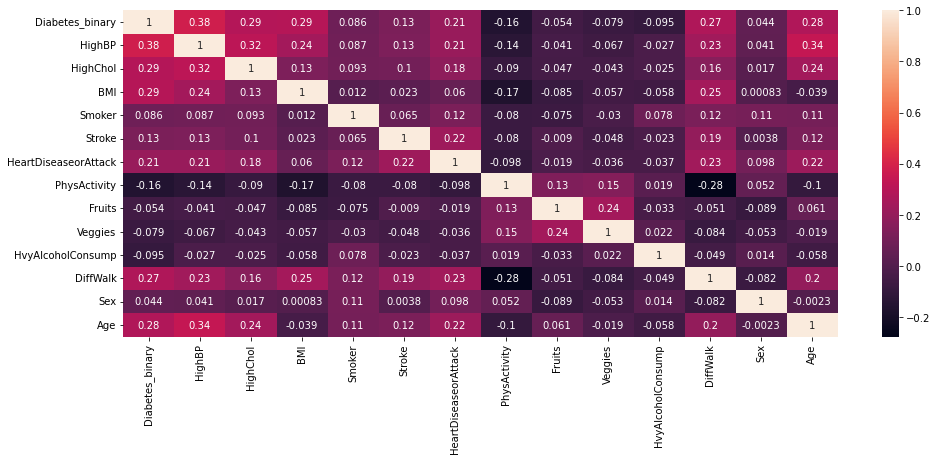

In [8]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)

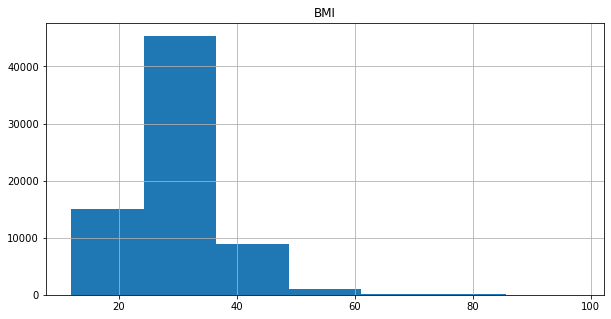

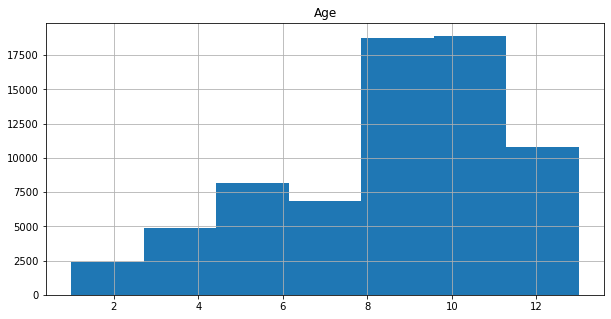

In [9]:
df["BMI"].hist(bins=7, figsize=(10,5))
plt.title("BMI")
plt.show()
df["Age"].hist(bins=7, figsize=(10,5))
plt.title("Age")
plt.show()

# Escalamieto y separacion de los datos

In [10]:
minmax_scale = MinMaxScaler().fit_transform(df) 
df = pd.DataFrame(minmax_scale,columns=df.columns)
#Escalamos los datos con Min Max, para que todas tengan unrando de 0-1, (NO BENEFICIA A REDES NEURONALES)

In [11]:
feature_names = df.columns
feature_names = feature_names.drop("Diabetes_binary")
X = df[feature_names]
Y = df["Diabetes_binary"]
#Separamos los datos en features y target

In [12]:
X.describe()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Sex,Age
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.563458,0.525703,0.207639,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.252730,0.456997,0.632005
std,0.495960,0.499342,0.082720,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.434581,0.498151,0.237679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.151163,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000
50%,1.000000,1.000000,0.197674,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.666667
75%,1.000000,1.000000,0.244186,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
pca = PCA(.95)
X = pca.fit_transform(X)
my_list = ["Principal Component "+str(i) for i in range(pca.n_components_)]
X = pd.DataFrame(X,columns=my_list)
# Una vez que los datos estan escalados, se hace la reducción de dimensionalidad PCA

In [14]:
X.describe()

,Principal Component 0,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9
count,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04
mean,3.116287e-16,1.346239e-17,-3.866491e-17,-1.980975e-16,7.692541e-17,7.946571e-17,-9.059079e-17,-7.990270e-17,-1.888692e-17,-2.583485e-18
std,6.507464e-01,5.332532e-01,5.090359e-01,4.783889e-01,4.385680e-01,4.055832e-01,3.767874e-01,3.738061e-01,3.241496e-01,2.286798e-01
min,-1.182762e+00,-1.125855e+00,-1.142787e+00,-1.169304e+00,-1.192160e+00,-1.007846e+00,-1.122330e+00,-8.266214e-01,-7.046242e-01,-4.065442e-01
25%,-5.255540e-01,-4.123385e-01,-3.419016e-01,-3.688182e-01,-3.063269e-01,-2.224736e-01,-2.359108e-01,-2.618233e-01,-1.612828e-01,-7.280716e-02
50%,-9.054456e-03,-4.198682e-03,-3.792391e-02,1.488369e-02,1.656238e-02,-1.036746e-02,-5.079414e-03,-3.272266e-02,-2.976852e-02,-1.854962e-02
75%,4.914412e-01,3.720949e-01,3.487877e-01,3.373331e-01,2.743684e-01,2.570194e-01,2.104596e-01,1.295894e-01,8.866183e-02,7.587193e-03
max,1.752197e+00,1.399325e+00,1.645135e+00,1.281445e+00,1.574997e+00,1.195407e+00,1.403387e+00,1.284494e+00,1.257430e+00,1.035641e+00


In [15]:
sum(pca.explained_variance_ratio_) #Que tanta informacion queda

0.9561169960316976

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
#Dividimos en datos de entrenamiento y de prueba

# Modelamos

In [50]:
models = []
models.append(('K - Nearest Neighbors Classifier ', KNeighborsClassifier()))
models.append(('Support Vector Machine Classifier', SVC(probability = True)))
models.append(('Random Forest Classifier         ', RandomForestClassifier()))
models.append(('Redes Neuronales                 ', MLPClassifier(max_iter=5000)))
models.append(('Decision Tree                    ', DecisionTreeClassifier()))


In [51]:
ac_score = ["Accuracy: "]
pre_score = ["Precision: "]
sen_score = ["Sensitivity: "]
espe_score = ["Specificity: "]
roc_score = ["Roc Auc Score: "]
cfm_list = []
y_prob_list = []

In [52]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    y_pred_prob_pos =model.predict_proba(X_test)[:,1] #es diferente al predict normal
    TP = cfm[1][1]
    TN = cfm[0][0]
    FP = cfm[0][1]
    FN = cfm[1][0]
    x1 = str(round(accuracy_score(y_test, y_pred),3))
    x2 = "True Positive: " + str(TP) + " True Negative: " + str(TN) + " False Positivee: " + str(FP) + " False Negative: " + str(FN)
    x3 = str(round(precision_score(y_test, y_pred),3))
    x4 = str(round(TP/(TP+FN),3))
    x5 = str(round(TN/(TN+FP),3))
    x6 = str(round(roc_auc_score(y_test,y_pred_prob_pos),3))
    ac_score += [x1]
    cfm_list += [x2]
    pre_score += [x3]
    sen_score += [x4]
    espe_score += [x5]
    roc_score += [x6]
    y_prob_list += [y_pred_prob_pos] #para poder graficar 
    

In [53]:
models_list = models

for (name, mod), ac in zip(models_list, cfm_list):
    print(name + " - "+ ac)

K - Nearest Neighbors Classifier  - True Positive: 4982 True Negative: 4782 False Positivee: 2308 False Negative: 2067
Support Vector Machine Classifier - True Positive: 5244 True Negative: 4759 False Positivee: 2331 False Negative: 1805
Random Forest Classifier          - True Positive: 4741 True Negative: 4751 False Positivee: 2339 False Negative: 2308
Redes Neuronales                  - True Positive: 5292 True Negative: 4768 False Positivee: 2322 False Negative: 1757
Decision Tree                     - True Positive: 4310 True Negative: 5031 False Positivee: 2059 False Negative: 2739


In [54]:
total = ["Total: ",0,0,0,0,0]

data = [ac_score, pre_score, sen_score, espe_score, roc_score]

for x in data:
    total[1] += float(x[1])
    total[2] += float(x[2])
    total[3] += float(x[3])
    total[4] += float(x[4])
    total[5] += float(x[5])
    
data = [ac_score, pre_score, sen_score, espe_score, roc_score, total]

col_names = ["KNN", "SVM", "RandF", "RedesN", "Dtree"]

print(tabulate(data, headers=col_names))

                  KNN    SVM    RandF    RedesN    Dtree
--------------  -----  -----  -------  --------  -------
Accuracy:       0.691  0.707    0.671     0.712    0.661
Precision:      0.683  0.692    0.67      0.695    0.677
Sensitivity:    0.707  0.744    0.673     0.751    0.611
Specificity:    0.674  0.671    0.67      0.672    0.71
Roc Auc Score:  0.747  0.769    0.736     0.781    0.676
Total:          3.502  3.583    3.42      3.611    3.335


# Grafica ROC

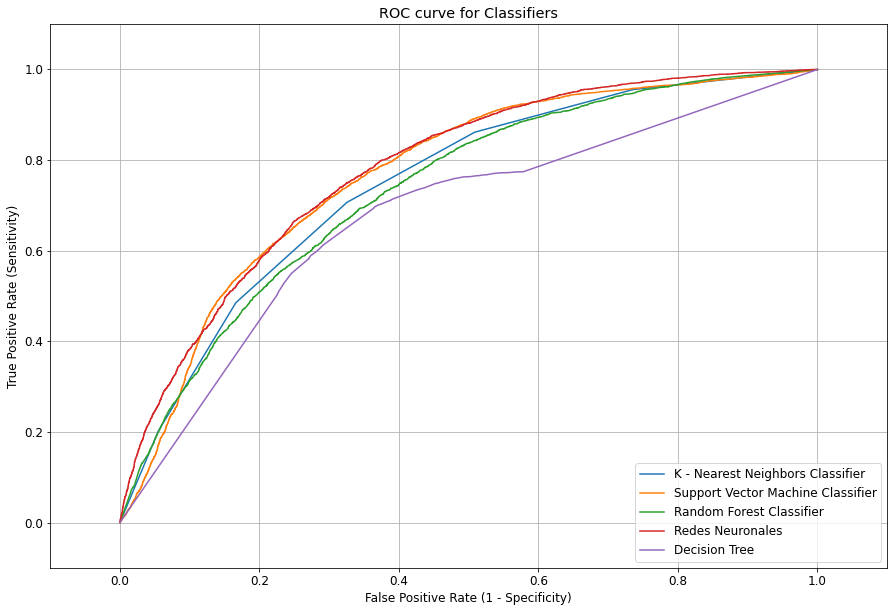

In [55]:
plt.figure(figsize=(15, 10))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Classifiers') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.grid(True)
    
models_list = models

for (name, mod), ac in zip(models_list, y_prob_list):
    fpr, tpr, thresholds = roc_curve(y_test, ac)
    plt.plot(fpr, tpr, label=name)
    
plt.legend(loc = 'lower right')

# Ajuste de Hiperparametros

### KNN

In [56]:
knn_2 = KNeighborsClassifier()

#dicionario de hiperparametros
hyperparameters_1 = {
    "leaf_size":list(range(1,10)),
    "n_neighbors":list(range(1,10)),
    "p":[1,2]
} 

# Usamos grid search para buscar los mejores 
grid_1 = GridSearchCV(knn_2, hyperparameters_1, cv=5)

#se los asignamos a un modelo
optimal_model_1 = grid_1.fit(X_train, y_train)

print("Best Parameters:", optimal_model_1.best_params_)
print("Model:", optimal_model_1.best_estimator_)

Best Parameters: {'leaf_size': 3, 'n_neighbors': 9, 'p': 2}
Model: KNeighborsClassifier(leaf_size=3, n_neighbors=9)


### SVM

In [21]:
svm_2 = SVC(probability = True)

hyperparameters_2 = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001]
}
 
grid_2 = GridSearchCV(svm_2, hyperparameters_2, cv= 5)
 
optimal_model_2 = grid_2.fit(X_train.sample(n = 5000, random_state=42), y_train.sample(n = 5000, random_state=42))

print("Best Parameters:", optimal_model_2.best_params_)
print("Model:", optimal_model_2.best_estimator_)

Best Parameters: {'C': 0.1, 'gamma': 0.01}
Model: SVC(C=0.1, gamma=0.01, probability=True)


### Random Forests

In [32]:
rfc_2 = RandomForestClassifier()

hyperparameters_3 = {
    'criterion': ["gini", "entropy"],
    'n_estimators': [100, 200],
    'min_samples_split' : [2,6, 10],
}
 
grid_3 = GridSearchCV(rfc_2, hyperparameters_3, cv= 5)
 
optimal_model_3 = grid_3.fit(X_train, y_train)

print("Best Parameters:", optimal_model_3.best_params_)
print("Model:", optimal_model_3.best_estimator_)

Best Parameters: {'criterion': 'gini', 'min_samples_split': 10, 'n_estimators': 100}
Model: RandomForestClassifier(min_samples_split=10)


### Neural Networks

In [34]:
nn_2 =  MLPClassifier(max_iter=5000)

hyperparameters_4 = {
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
}
grid_4 = GridSearchCV(nn_2, hyperparameters_4, cv= 5)
 
optimal_model_4 = grid_4.fit(X_train, y_train)

print("Best Parameters:", optimal_model_4.best_params_)
print("Model:", optimal_model_4.best_estimator_)

Best Parameters: {'activation': 'relu', 'solver': 'adam'}
Model: MLPClassifier(max_iter=5000)


# Validacion Cruzada

### KNN

In [27]:
knn_3 = KNeighborsClassifier(leaf_size=3, n_neighbors=9)
scores = cross_val_score(knn_3, X_test,y_test, cv=5, scoring='accuracy')
print(f"Average: {round(scores.mean(),2)} Std Dev: +/-{round(scores.std(),2)}")

Average: 0.7 Std Dev: +/-0.02


### SVM

In [24]:
svm_3 = SVC(C=0.1, gamma=0.01, probability=True)
scores = cross_val_score(svm_3, X_test,y_test, cv=5, scoring='accuracy')
print(f"Average: {round(scores.mean(),2)} Std Dev: +/-{round(scores.std(),2)}")

Average: 0.69 Std Dev: +/-0.01


### Random Forests

In [31]:
rfc_3 = RandomForestClassifier(min_samples_split=10)
scores = cross_val_score(rfc_3, X_test,y_test, cv=5, scoring='accuracy')
print(f"Average: {round(scores.mean(),2)} Std Dev: +/-{round(scores.std(),2)}")

Average: 0.69 Std Dev: +/-0.01


### Neural Networks

In [30]:
nn_3 = MLPClassifier(max_iter=5000)
scores = cross_val_score(nn_3, X_test,y_test, cv=5, scoring='accuracy')
print(f"Average: {round(scores.mean(),2)} Std Dev: +/-{round(scores.std(),2)}")

Average: 0.71 Std Dev: +/-0.0
